# Projeto 2

Aluno: André Soranzzo Mota RA: 166404

Aluna: Rebecca Moreira Messias RA: 186416

# 1. Objetivos

Este trabalho visa aplicar métodos de aprendizagem para resolver tarefas de classificação e regressão. Em cada tarefa, deve-se utilizar as métricas e métodos de aprendizagem apropriados.

## 1.1 Importação e instalação de bibliotecas

As bibliotecas utilizadas neste projeto foram: 
- **numpy**: manipular arrays
- **pandas**: manipular os dados

In [1]:
!pip install numpy
!pip install pandas

import numpy as np
import pandas as pd

     |████████████████████████████████| 15.3 MB 7.5 MB/s eta 0:00:01    |▊                               | 358 kB 7.5 MB/s eta 0:00:03
     |████████████████████████████████| 9.9 MB 9.0 MB/s eta 0:00:011


# 2. Parte 1 - Regressão

Considere que você é um goleiro em uma partida de futebol robótico na RoboCup Teen Size League. Seu oponente vai chutar
uma bola contra você. Seu objetivo é prever a posição da bola para interceptá-la, ou seja, defender seu gol.
goleiro, está em x = 0, y = 0. O trabalho consiste na implementação de uma regressão linear e polinomial para prever a trajetória da bola. São dados dois conjuntos de dados: kick1 e kick2. Eles representam duas trajetórias diferentes para a bola. Deve-se aprender o melhor modelo para ajustar os dados.

## 2.1. Algoritmo de Regressão Linear

## 2.2. Algoritmo de Regressão Polinomial

# 3. Parte 2 - Classificação

Na segunda parte deve-se resolver uma tarefa de classificação usando métodos de aprendizagem supervisionada. Iremos empregar o conjunto de dados de reconhecimento de dígitos manuscritos com base na caneta. É um banco de imagens simples e conhecido para reconhecimento de imagens. Consiste em imagens em escala de cinza de 8 por 8 pixels divididas em 10 classes de dígitos. Uma descrição completa pode ser encontrada no link: archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits.


In [10]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap

%matplotlib inline

In [4]:
digits = load_digits()

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

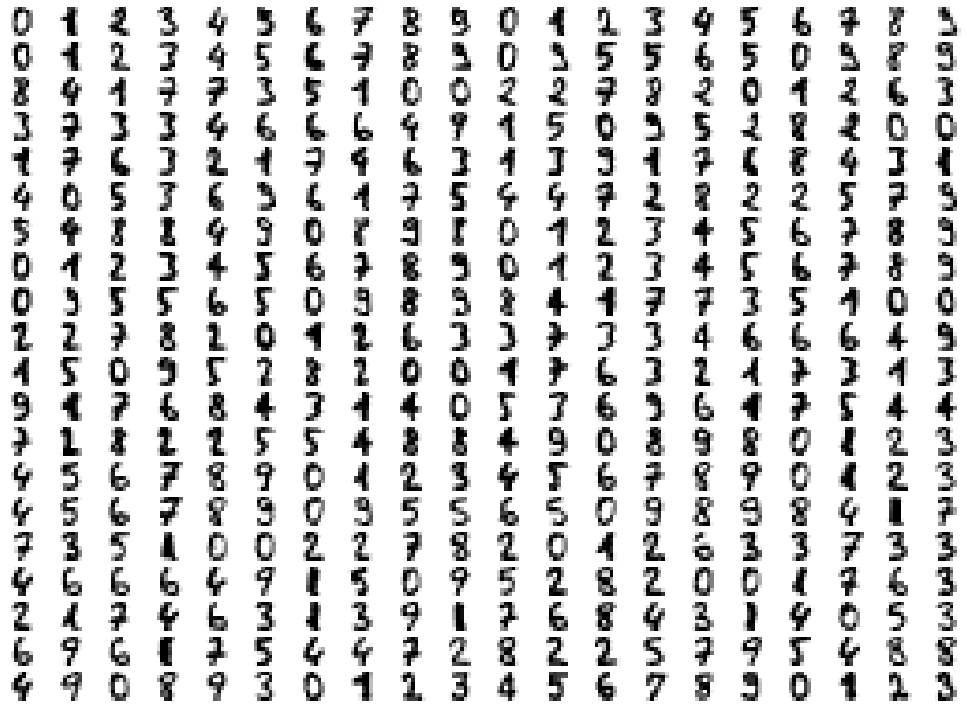

In [5]:
fig, ax_array = plt.subplots(20, 20)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

C:\Users\rebec\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rebec\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rebec\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rebec\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rebec\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rebec\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

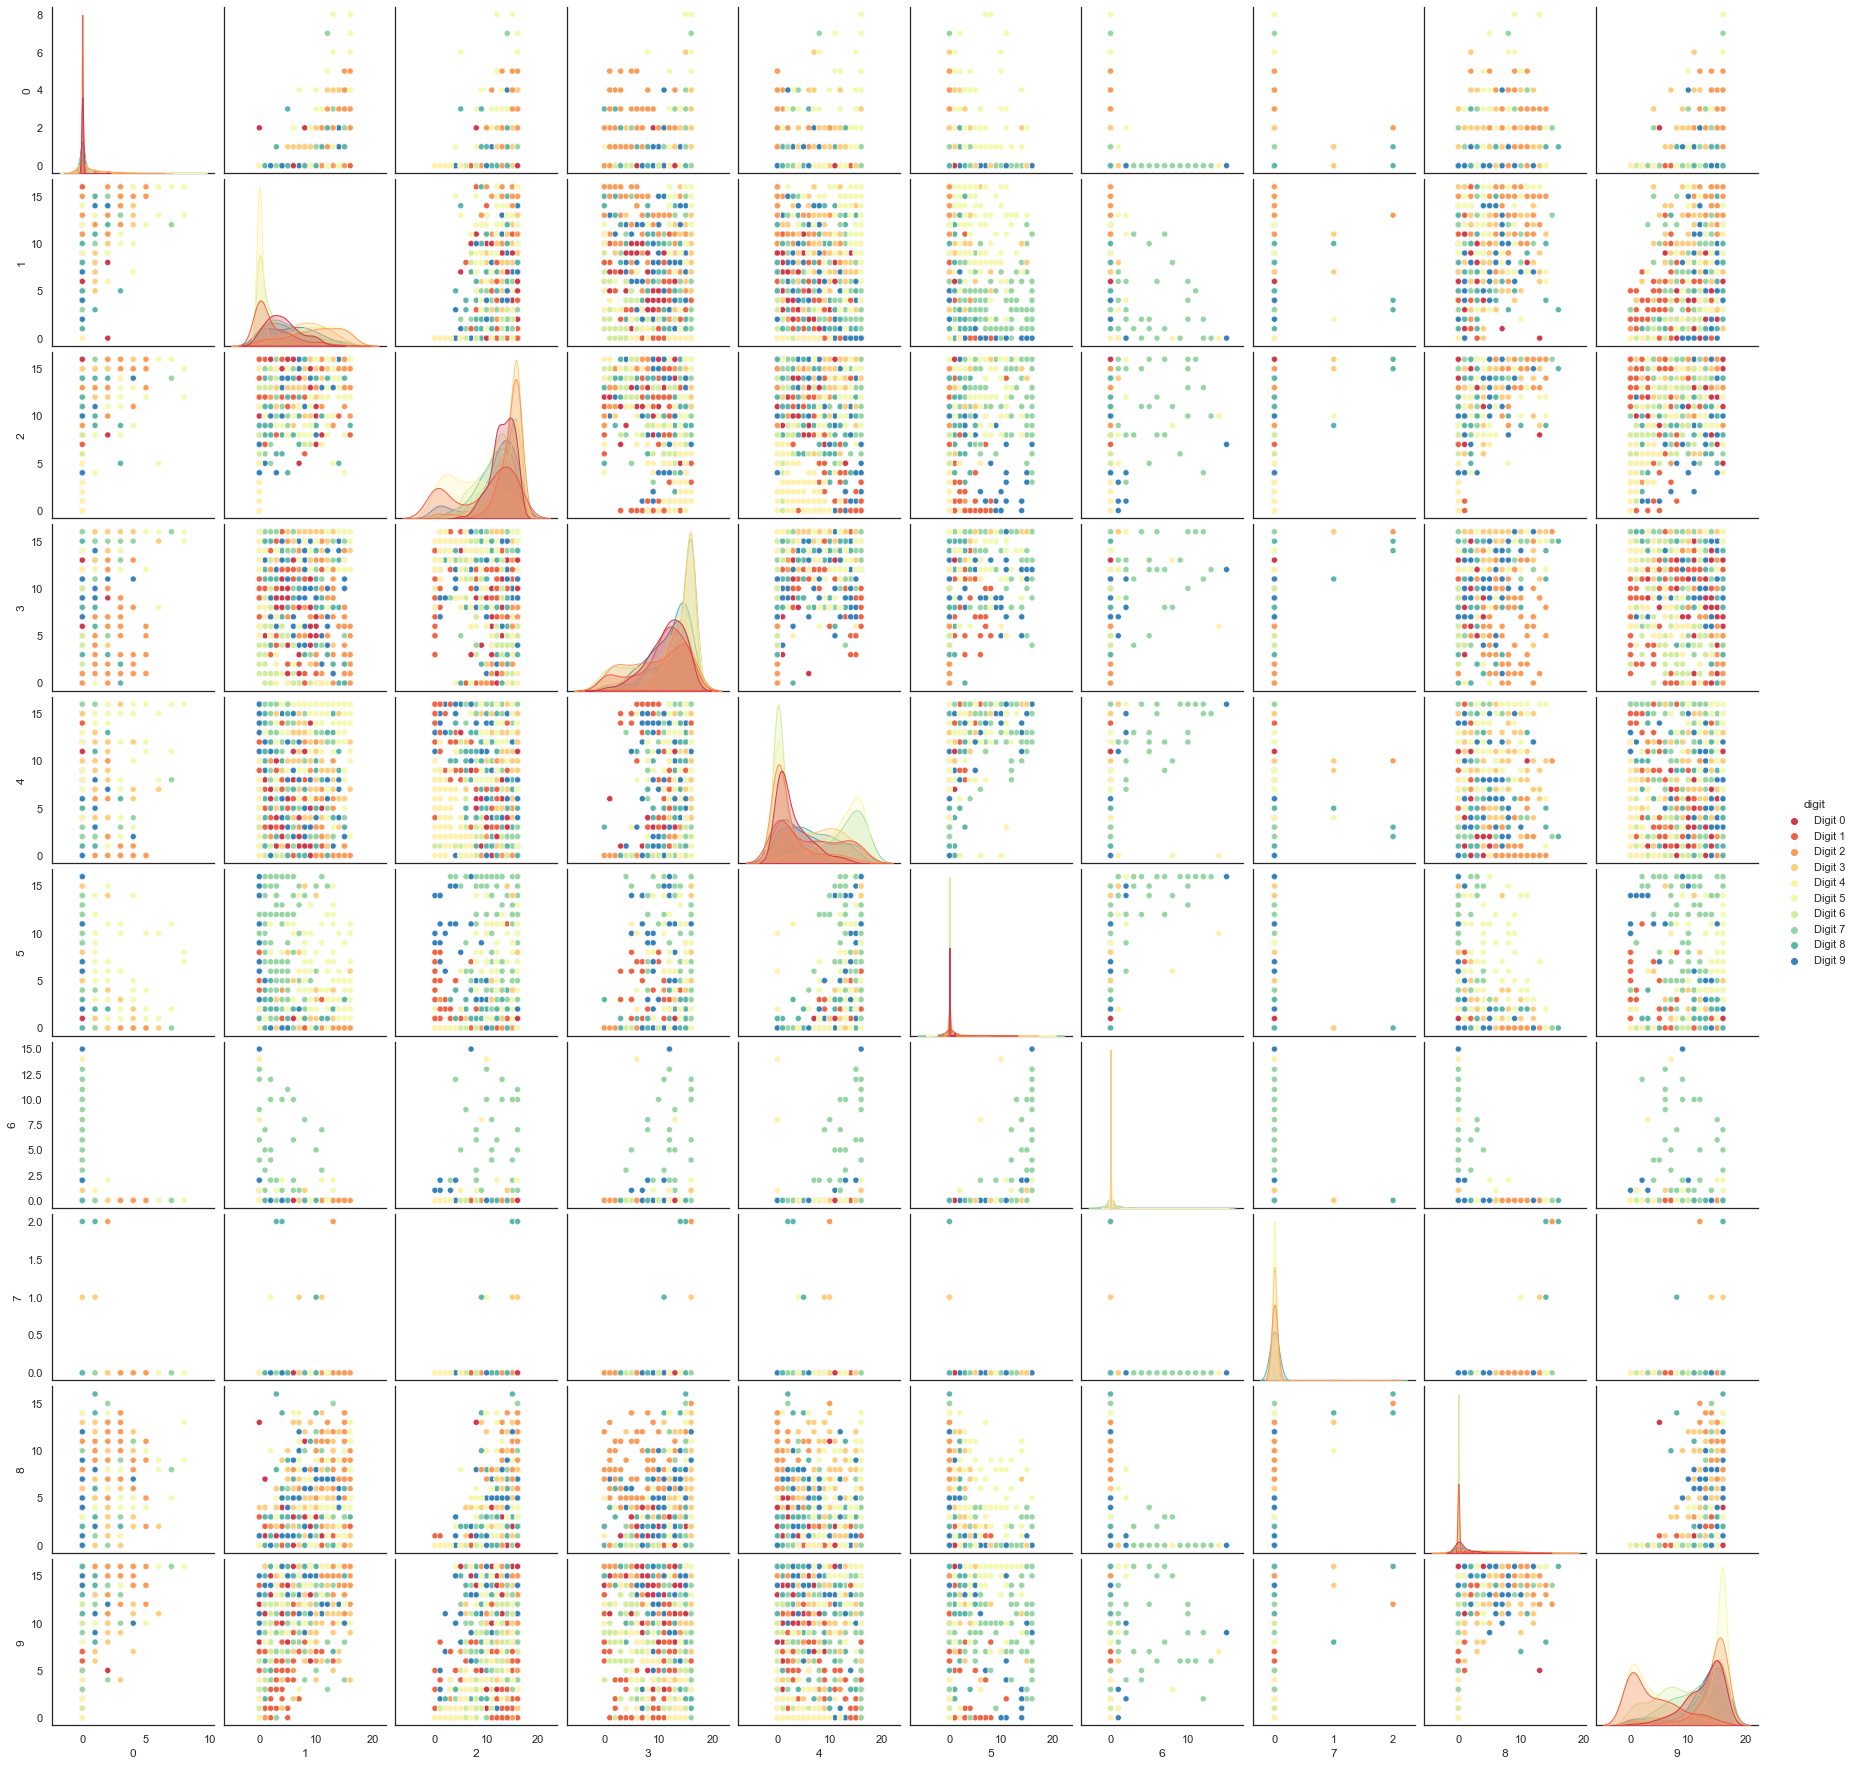

In [6]:
digits_df = pd.DataFrame(digits.data[:,1:11])
digits_df['digit'] = pd.Series(digits.target).map(lambda x: 'Digit {}'.format(x))
sns.pairplot(digits_df, hue='digit', palette='Spectral')

In [11]:
reducer = umap.UMAP(random_state=42)
reducer.fit(digits.data)

UMAP(dens_frac=0.0, dens_lambda=0.0, random_state=42)

In [13]:
embedding = reducer.transform(digits.data)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(1797, 2)

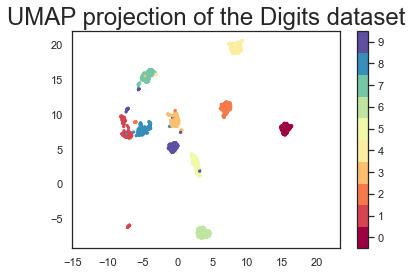

In [14]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);

In [15]:
from io import BytesIO
from PIL import Image
import base64

In [16]:
def embeddable_image(data):
    img_data = 255 - 15 * data.astype(np.uint8)
    image = Image.fromarray(img_data, mode='L').resize((64, 64), Image.BICUBIC)
    buffer = BytesIO()
    image.save(buffer, format='png')
    for_encoding = buffer.getvalue()
    return 'data:image/png;base64,' + base64.b64encode(for_encoding).decode()

In [17]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral10

output_notebook()

Loading BokehJS ...

In [18]:
digits_df = pd.DataFrame(embedding, columns=('x', 'y'))
digits_df['digit'] = [str(x) for x in digits.target]
digits_df['image'] = list(map(embeddable_image, digits.images))

datasource = ColumnDataSource(digits_df)
color_mapping = CategoricalColorMapper(factors=[str(9 - x) for x in digits.target_names],
                                       palette=Spectral10)

plot_figure = figure(
    title='UMAP projection of the Digits dataset',
    plot_width=600,
    plot_height=600,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(tooltips="""
<div>
    <div>
        <img src='@image' style='float: left; margin: 5px 5px 5px 5px'/>
    </div>
    <div>
        <span style='font-size: 16px; color: #224499'>Digit:</span>
        <span style='font-size: 18px'>@digit</span>
    </div>
</div>
"""))

plot_figure.circle(
    'x',
    'y',
    source=datasource,
    color=dict(field='digit', transform=color_mapping),
    line_alpha=0.6,
    fill_alpha=0.6,
    size=4
)
show(plot_figure)